In [1]:
import torch, pickle, numpy as np, matplotlib.pyplot as plt
from src.TorchDSP.dataloader import get_k, get_k_batch

Q = {}
res, code = pickle.load(open('_outputs/Qfactor/Nmodes2/CDC.pkl','rb'))
P = np.arange(-8, 9)
Rs = 40
Nch = 3
k = get_k_batch(3, Rs, code)
Q['CDC'] =  np.mean(res['BER from 20000th symb']['CDC']['Qsq'][k], axis=-1)

for stps in [1,2,4, 10, 20, 40]:
    res, code = pickle.load(open(f'_outputs/Qfactor/Nmodes2/DBP_stps{stps}.pkl','rb'))
    k = get_k_batch(Nch, Rs, code)
    Q[f'DBP stps={stps}']  = np.mean(res['BER from 20000th symb'][f'DBP stps={stps}']['Qsq'][k], axis=-1)


Text(0.5, 1.0, 'Rs=40G, Nch=3')

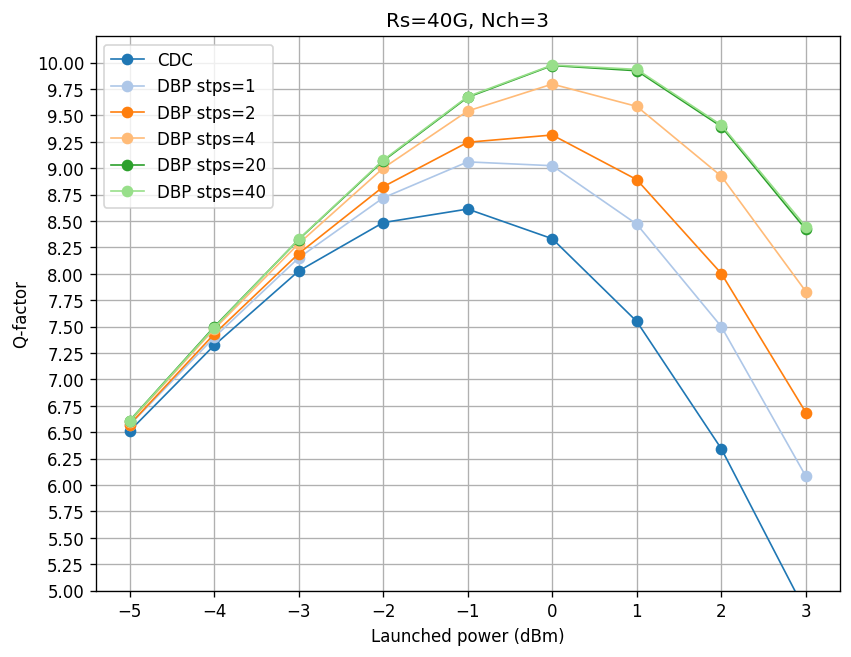

In [3]:
# set matplotlib use different color for each line
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)
plt.figure(figsize=(8, 6), dpi=120)
p_left = 3
p_right = 12
for key in Q.keys():
    if 'PBC' in key:
        if key in ['AMPBC-M401']:
            
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '--*', linewidth=1, label=key)
        
        if key in ['PBC-M401']:
           
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-*', linewidth=1, label=key)
    else:
    
        if key in ['CDC', 'DBP stps=1', 'DBP stps=2', 'DBP stps=4', 'DBP stps=20', 'DBP stps=40']:
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-o', linewidth=1, label=key)

# plt.plot(P[p_left:p_right], [Q1[i] for i in range(-5, 4)], '-o', linewidth=1, label='Q-factor from [1]')


plt.ylim(5, 10.25)
plt.yticks(np.arange(5, 10.25, 0.25))
plt.xlabel('Launched power (dBm)')
plt.ylabel('Q-factor')
plt.legend()
plt.grid()
plt.title(f'Rs={Rs}G, Nch={Nch}')

In [4]:
import h5py
f = h5py.File('dataset/test.h5', 'r')

In [5]:
from src.TorchSimulation.receiver import BER
from src.TorchDSP.loss import Qsq


def calc_Q(key, N):
    s = f[key]['Rx_CDCDSP'].attrs['start']
    e = f[key]['Rx_CDCDSP'].attrs['stop']
    y = torch.from_numpy(f[key]['Rx_CDCDSP'][0:2, N:])
    x = torch.from_numpy(f[key]['Tx'][:,s:e][0:2, N:])
    return Qsq(np.mean(BER(y,x)['BER']))

In [6]:
Qs = {}
for key in f.keys():
    Qs[f[key].attrs['Pch']] = [calc_Q(key, n) for n in range(0, 20000, 2000)]

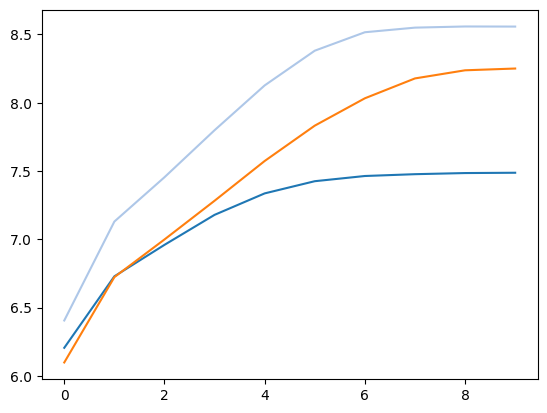

In [7]:
plt.plot(Qs[1])
plt.plot(Qs[-1])
plt.plot(Qs[0])

In [8]:
# dic = torch.load('_models/simulation_nneq/Test5_Pch2/AMPBC_L40_rho4ckpt60', map_location='cpu')
# Q['AMPBC-M41'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L100ckpt40', map_location='cpu')
Q['AMPBC-M101'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)


dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L200ckpt40', map_location='cpu')
Q['AMPBC-M201'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/PBC_L200ckpt40', map_location='cpu')
Q['PBC-M201'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L400ckpt40', map_location='cpu')
Q['AMPBC-M401'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L600ckpt40', map_location='cpu')
Q['AMPBC-M601'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

dic = torch.load('_models/Nmodes2_Nch3_Rs40/PBC_L400ckpt40', map_location='cpu')
Q['PBC-M401'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

Qmy = Q['AMPBC-M401'] + np.array([0,0,0,0,0,0,0,0.06, 0.13, 0.26, 0.5, 1,0,0,0,0,0])

# dic = torch.load('_models/simulation_nn_Nch3_Rs40_Pch-1/AMPBC_L400', map_location='cpu')
# Q['AMPBC-M401'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)

# dic = torch.load('_models/simulation_nn_Nch3_Rs40_Pch-1/PBC_L200', map_location='cpu')
# Q['PBC-M201'] = np.mean(dic['metric']['Qsq'][::2], axis=-1)


In [9]:
Q['AMPBC-M401']

array([ 3.7728715 ,  4.7394896 ,  5.641672  ,  6.528095  ,  7.4111757 ,
        8.178888  ,  8.843815  ,  9.22677   ,  9.30111   ,  8.824559  ,
        7.8078833 ,  6.343586  ,  0.42786062, -1.7200427 , -2.0591416 ,
       -4.037965  , -7.753159  ], dtype=float32)

Text(0.5, 1.0, 'Rs=40G, Nch=3')

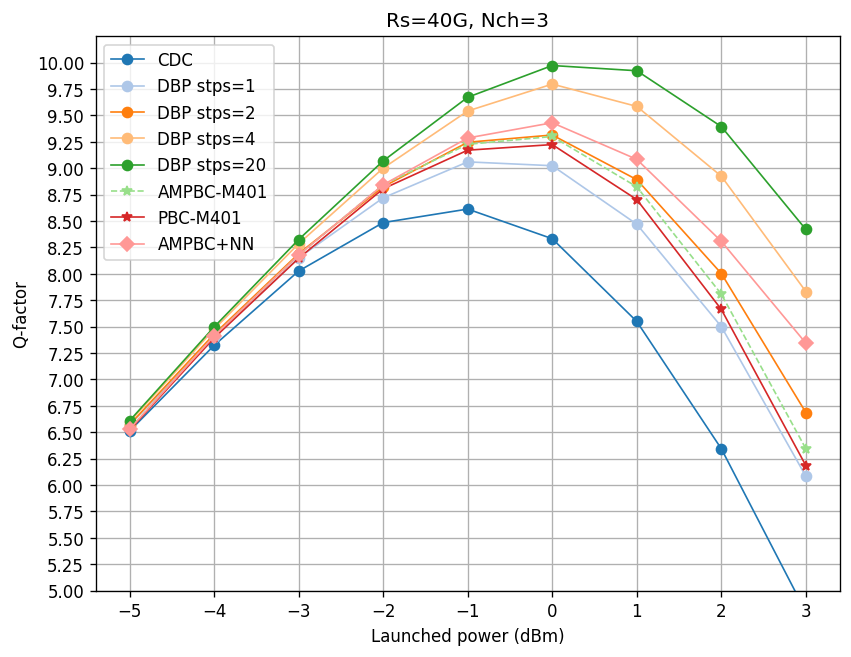

In [10]:
# set matplotlib use different color for each line
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)
plt.figure(figsize=(8, 6), dpi=120)
p_left = 3
p_right = 12
for key in Q.keys():
    if 'PBC' in key:
        if key in ['AMPBC-M401']:
            
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '--*', linewidth=1, label=key)
        
        if key in ['PBC-M401']:
           
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-*', linewidth=1, label=key)
    else:
    
        if key in ['CDC', 'DBP stps=1', 'DBP stps=2', 'DBP stps=4', 'DBP stps=20']:
            plt.plot(P[p_left:p_right], Q[key][p_left:p_right], '-o', linewidth=1, label=key)


plt.plot(P[p_left:p_right], Qmy[p_left:p_right], '-D', linewidth=1, label='AMPBC+NN')

plt.ylim(5, 10.25)
plt.yticks(np.arange(5, 10.25, 0.25))
plt.xlabel('Launched power (dBm)')
plt.ylabel('Q-factor')
plt.legend()
plt.grid()
plt.title(f'Rs={Rs}G, Nch={Nch}')

In [11]:
y,x,t = pickle.load(open('data/Nmodes2/test_batch10_4e5_afterCDCDSP.pkl', 'rb'))

In [12]:
from src.TorchSimulation.receiver import BER
from src.TorchDSP.dataloader import get_k_batch

In [13]:
data = pickle.load(open('data/Nmodes2/test.pkl', 'rb'))

In [14]:
data[1]

{'path': '/gpfs/share/home/2001110035/data/batch4_bits4e5_SF1.2_mode2',
 'Nch': [1, 3, 5],
 'Rs': [20, 40, 80],
 'batch_id': [1],
 'power': [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 'merge': True,
 'transform': None,
 'dbpsteps': None}

In [15]:
import torch
from src.TorchDSP.train_pbc import  models

dic = torch.load('_models/Nmodes2_Nch3_Rs40/AMPBC_L100ckpt40', map_location='cpu')
net = models[dic['model_name']](**dic['model info'])
net.load_state_dict(dic['model'])

net.eval() 


AmFoPBC(
  (xpm_conv1): Conv1d(1, 1, kernel_size=(101,), stride=(1,), bias=False)
  (xpm_conv2): Conv1d(1, 1, kernel_size=(101,), stride=(1,), bias=False)
  (nn1): ComplexLinear(
    (real): Linear(in_features=214, out_features=1, bias=False)
    (imag): Linear(in_features=214, out_features=1, bias=False)
  )
  (nn2): ComplexLinear(
    (real): Linear(in_features=214, out_features=1, bias=False)
    (imag): Linear(in_features=214, out_features=1, bias=False)
  )
)

In [18]:
from src.TorchDSP.dataloader import get_signals

train_path = 'data/Nmodes2/train_batch10_4e5_afterCDCDSP.pkl'
test_path = 'data/Nmodes2/test_batch10_4e5_afterCDCDSP.pkl'
Nch = 3 
Rs = 40
Pch = [-1]
train_signal, train_truth, train_z = get_signals(train_path, Nch, Rs, Pch,  device='cpu', idx=[0,None])
test_signal, test_truth, test_z = get_signals(test_path, Nch, Rs, Pch, device='cpu', idx=[0,None])